# Sudodle simulations


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from modules.utils import cyclic_latin_square
from modules.simulate_game import run_multiple_simulations_in_parallel
from modules.sudodle_plotting import plot_simulation_histogram


## Results starting from the classic cyclic latin square


  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

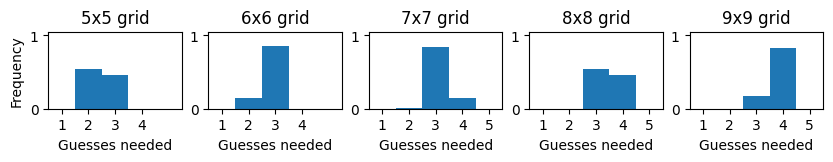

In [3]:
fig, axes = plt.subplots(1, 5, figsize=(10, 1))
for i, ax in enumerate(axes):
    n = i + 5
    cyclic_square = cyclic_latin_square(n)
    tries_list = run_multiple_simulations_in_parallel(
        10_000 * [cyclic_square], n_processes=4
    )
    n_tries_list = [len(tries) + 1 for tries in tries_list if tries is not None]
    plot_simulation_histogram(n_tries_list, ax=ax, title=f"{n}x{n} grid")
    if ax != axes[0]:
        ax.set_ylabel("")
fig.savefig("outputs/simulation_5_to_9.jpeg", bbox_inches="tight")

## Results with 5 different (random) latin squares


  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

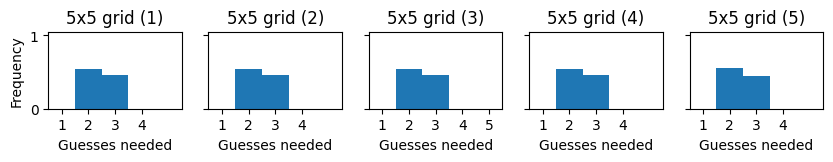

In [4]:
from modules.generate_random_latin_square import uniform_random_latin_square

fig, axes = plt.subplots(1, 5, figsize=(10, 1))
for i, ax in enumerate(axes):
    first_guess = uniform_random_latin_square(5)
    tries_list = run_multiple_simulations_in_parallel(10_000 * [first_guess])
    n_tries_list = [len(tries) + 1 for tries in tries_list if tries is not None]
    plot_simulation_histogram(n_tries_list, ax=ax, title=f"5x5 grid ({i + 1})")
    if ax != axes[0]:
        ax.set_ylabel("")
        ax.set_yticklabels([])
fig.savefig("outputs/simulations_random_latin_squares.jpeg", bbox_inches="tight")


## Results with just random squares

(each square has 5 ones, 5 twos, etc.)


  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

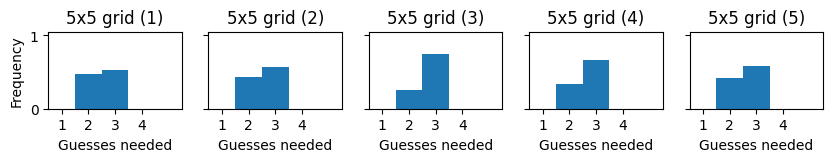

In [5]:
from modules.utils import random_square

fig, axes = plt.subplots(1, 5, figsize=(10, 1))
first_guesses = [random_square(5) for _ in range(5)]
for i, (ax, first_guess) in enumerate(zip(axes, first_guesses)):
    tries_list = run_multiple_simulations_in_parallel(10_000 * [first_guess])
    n_tries_list = [len(tries) + 1 for tries in tries_list if tries is not None]
    plot_simulation_histogram(n_tries_list, ax=ax, title=f"5x5 grid ({i + 1})")
    if ax != axes[0]:
        ax.set_ylabel("")
        ax.set_yticklabels([])
fig.savefig("outputs/simulations_random_squares.jpeg", bbox_inches="tight")

## The 1s-2s-3s... is maybe the worst first guess


| 1 1 1 1 1
| 2 2 2 2 2
| 3 3 3 3 3
| 4 4 4 4 4
| 5 5 5 5 5


  0%|          | 0/10000 [00:00<?, ?it/s]

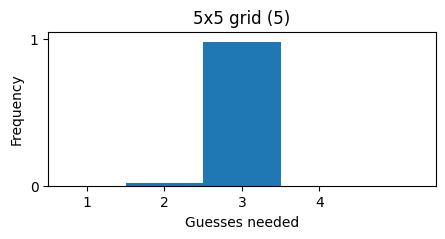

In [11]:
from modules.simulate_game import square_to_string
import matplotlib.pyplot as plt

n = 5
first_guess = [n * [i + 1] for i in range(n)]
print(square_to_string(first_guess))
fig, ax = plt.subplots(1, 1, figsize=(5, 2))
tries_list = run_multiple_simulations_in_parallel(10_000 * [first_guess])
n_tries_list = [len(tries) + 1 for tries in tries_list if tries is not None]
plot_simulation_histogram(n_tries_list, ax=ax, title=f"5x5 grid ({i + 1})")